<style>
    .zero-margin {
        margin: 0 px;
     }
</style>

<div class="zero-margin" style="text-align: center;">
    <p style="text-align: center; font-size: 20px; margin-bottom: 10px;">Practice Case 04<p>
    <p style="text-align: center; font-size: 40px; margin: 0px; font-weight: bold;text-transform: uppercase;">Machine Learning</p><br/>
    <p  style="text-align: center; margin-bottom: 0px;">Monday, November 4th 2019</p>
     <p  style="text-align: center; margin-top: 0px;">M. Haries Ramdhani</p>
</div>

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit

pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings("ignore")

In [2]:
from bs4 import BeautifulSoup as bs
import requests
import re
import time

In [163]:
df = pd.read_csv("../data/flight/training_dataset.csv")
df_test = pd.read_csv("../data/flight/test_dataset.csv")

In [166]:
df.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Sandakan,SDK,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Hanoi,HAN,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


In [167]:
# gives some infos on columns types and number of null values
df_info = pd.DataFrame(df.dtypes).rename(columns={0:'data_type'})
df_info["#_unique"] = df.nunique()
df_info["#_nan"] = df.isnull().sum().astype(int)
df_info["%_nan"] = df.isnull().sum()/df.shape[0]*100

df_info.sort_values(by="#_unique", ascending=False)

,data_type,#_unique,#_nan,%_nan
id,int64,111068,0,0.000000
scheduled_arrival_time,object,14210,5,0.004502
scheduled_departure_time,object,12912,0,0.000000
number,object,2515,0,0.000000
flight_duration,object,693,0,0.000000
delay,int64,350,0,0.000000
arrival_airport_gate,object,267,98981,89.117478
departure_airport_gate,object,189,44209,39.803544
arrival_airport_code,object,154,0,0.000000
arrival_airport_name,object,154,0,0.000000


Looking at the DataFrame above we got these insights:
1. `scheduled_arrival_time` and `scheduled_departure_time` have to be converted into time format
2. `arrival_airport_gate`, `arrival_airport_terminal`, `departure_airport_gate`, `departure_airport_terminal` contain the most missing values, this can be caused by the fact that the passengers aren't tracked based on the gates and terminals. Percentages of their missing values are very high (would be nice if it can be dropped).
3. `flight_duration` is still in the object (string) type. It needs to be converted to `int`, in this case to minutes
4. `departure_airport_region`, `departure_airport_country` and `departure_airport_timezone` only contain 1 unique value, so we can safely drop them
5. We can also scrape the flight distance data from another website to get the distance between the two airports

## Feature Engineering

### Get Scheduled Flight Duration

#### Convert the time data to time objects

In [168]:
df["scheduled_departure_time"] = pd.to_datetime(df["scheduled_departure_time"]) 
df["scheduled_arrival_time"] = pd.to_datetime(df["scheduled_arrival_time"])

In [169]:
df["scheduled_flight_duration"] = df["scheduled_arrival_time"] - df["scheduled_departure_time"]
df["scheduled_flight_duration"] = df["scheduled_flight_duration"].dt.components['hours'] * 60 + df["scheduled_flight_duration"].dt.components['minutes']

In [170]:
df.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,scheduled_flight_duration
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,65.0
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,115.0
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,115.0
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Sandakan,SDK,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0,175.0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Hanoi,HAN,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0,195.0


### Get Distance Between Two Airports

#### Get the Unique Route

In [171]:
route_df = df.drop_duplicates(subset=["departure_airport_code", "arrival_airport_code"])[["departure_airport_code", "arrival_airport_code"]]
route_df.head()

,departure_airport_code,arrival_airport_code
0,KUL,KBR
1,KUL,CGK
3,KUL,SDK
4,KUL,HAN
5,KUL,AOR


Basically what the below codes do is scraping the distance (in km) from prokerala.com using the dataframe of the unique route of the airplane.

In [172]:
flight_distances = []

for route in route_df.values:
    doc = f"https://www.prokerala.com/travel/airports/distance/from-{route[0].lower()}/to-{route[1].lower()}/"

    response = requests.get(doc, timeout = 10)
    soup = bs(response.content, "html.parser")

    content = [element.text for element in soup.find_all('div', {'class': 'tc'})]
    
    if content:
        flight_distance_content = content[1]

        flight_distance = re.findall(r"(\d+(\.\d+)?)", content[1])[1][0]
        print(flight_distance)
        flight_distances.append(float(flight_distance))
        
    else:
        flight_distances.append(np.nan)
    
    time.sleep(2)

#### Set the Value and Save it for Later Use

In [173]:
route_df["distance"] = flight_distances

route_df.to_csv("route_distance", index=False)

In [174]:
route_df = pd.read_csv("route_distance")

In [175]:
df = pd.merge(df, route_df,  how='left', left_on=["departure_airport_code", "arrival_airport_code"], right_on=["departure_airport_code", "arrival_airport_code"])

### Get the Day

In [176]:
df["scheduled_departure_day"] = df["scheduled_departure_time"].apply(lambda x: x.strftime("%A"))

### Flag Weekend

In [177]:
df["scheduled_departure_weekend_flag"] = df["scheduled_departure_day"].apply(lambda x: 1 if x in ["Sunday", "Saturday"] else 0)

### Get the Hour

In [178]:
df["scheduled_departure_hour"] = df["scheduled_departure_time"].apply(lambda x : x.hour)

### Get the Parts of the Day

https://7esl.com/times-of-the-day/

In [179]:
def convert_to_pod(hour):
    if hour <= 4:
        return'Late Night'
    elif hour <= 8:
        return 'Early Morning'
    elif hour <= 12:
        return 'Morning'
    elif hour <= 16:
        return'Noon'
    elif hour <= 20:
        return 'Eve'
    else:
        return'Night'

In [180]:
df["scheduled_departure_pod"] = df["scheduled_departure_hour"].apply(convert_to_pod)

### Flag Holiday

In [181]:
holiday_df = pd.read_csv("../data/flight/holiday_2018.csv")

In [182]:
holiday_df["Date"] = holiday_df["Date"].str.split("-").apply(lambda x: f"{x[2]}-{x[1]}-{x[0]}")

In [183]:
df["scheduled_departure_date"] = df["scheduled_departure_time"].apply(lambda x: x.strftime("%Y-%m-%d"))

holidays_2018 = list(holiday_df["Date"])

df["scheduled_departure_holiday_flag"] = df["scheduled_departure_date"].apply(lambda x: 1 if x in holidays_2018 else 0)

### Flag -1 Holiday

In [192]:
holidays_2018_1 = []
for holiday_2018 in holidays_2018:
    if holiday_2018[5:7] in ["10", "11"]:
        day_before = int(holiday_2018[-2:]) - 1
        day_after = int(holiday_2018[-2:]) + 1
        
        if day_before // 10 == 0:
            day_before = f"0{day_before}"
        
        if day_after // 10 == 0:
            day_after = f"0{day_after}"
        
        date_before = f"2018-{holiday_2018[5:7]}-{day_before}"
        date_after = f"2018-{holiday_2018[ 5:7]}-{day_after}"
        
        holidays_2018_1.append(date_before) 
        holidays_2018_1.append(date_after)

In [193]:
df["scheduled_departure_min_1_holiday_flag"] = df["scheduled_departure_date"].apply(lambda x: 1 if x in holidays_2018_1 else 0)

### Flag Delay

In [194]:
df["flag_delay"] = df["delay"].apply(lambda x : 1 if x > 0 else 0)

## Data Cleaning

### Drop Possibly Unused Features

The feature below are dropped based on these criteria:
1. Categorical features which have plenty number of unique values (e.g. `scheduled_arrival_time`)
2. Categorical features with similar number of unique values (e.g. `arrival_airport_name` and `arrival_airport_code` are pretty similar, one of them needs to be dropped)
3. Features which have more than ~40% of missing data
4. Features with only 1 unique value


In [195]:
df = df.drop([
    "id", 
    "scheduled_arrival_time", 
    "scheduled_departure_time", 
    "flight_duration",
    "arrival_airport_gate",
    "departure_airport_gate",
    "arrival_airport_name",
    "arrival_airport_city",
    "airline",
    "flight_equipment_name",
    "arrival_airport_timezone",
    "arrival_airport_country",
    "arrival_airport_terminal",
    "departure_airport_name",
    "departure_airport_city",
    "departure_airport_terminal",
    "arrival_airport_region",
    "departure_airport_region",
    "departure_airport_country",
    "departure_airport_timezone"
], axis=1)

In [196]:
df.head()

,number,airline_name,departure_airport_code,arrival_airport_code,flight_equipment_iata,delay,scheduled_flight_duration,distance,scheduled_departure_day,scheduled_departure_weekend_flag,scheduled_departure_hour,scheduled_departure_pod,scheduled_departure_date,scheduled_departure_holiday_flag,scheduled_departure_min_1_holiday_flag,flag_delay
0,AK6430,AirAsia,KUL,KBR,32S,2,65.0,385.98,Friday,0,22,Night,2018-10-05,0,1,1
1,ID*7164,Batik Air,KUL,CGK,32S,8,115.0,1129.47,Friday,0,22,Night,2018-10-05,0,1,1
2,MXD9116,Malindo Air,KUL,CGK,32S,8,115.0,1129.47,Friday,0,22,Night,2018-10-05,0,1,1
3,AK5198,AirAsia,KUL,SDK,32S,0,175.0,1846.94,Friday,0,22,Night,2018-10-05,0,1,0
4,AK516,AirAsia,KUL,HAN,32S,0,195.0,2102.37,Friday,0,22,Night,2018-10-05,0,1,0


### Drop Missing Values

In [197]:
df = df.dropna()

In [198]:
print(f"After missing values are removed the total number of rows become {df.shape[0]}")

After missing values are removed the total number of rows become 110836


### Drop Outliers

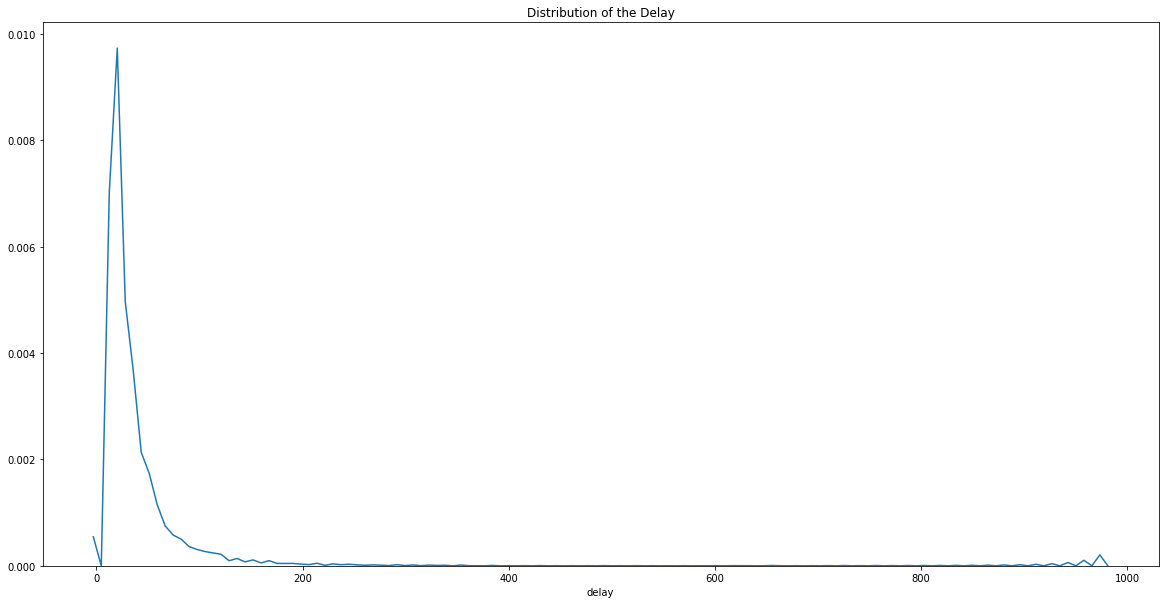

In [199]:
plt.figure(figsize=[20, 10])
sns.distplot(df["delay"], hist=False)
plt.title("Distribution of the Delay")
plt.show()

In [200]:
print(f"The total number of rows before the deletion of the outliers based on the column delay is {df.shape[0]}")

The total number of rows before the deletion of the outliers based on the column delay is 110836


In [201]:
q1 = df["delay"].quantile(0.25)
q3 = df["delay"].quantile(0.75)

iqr = q3 - q1

In [202]:
df = df[~(df["delay"] > (q3 + 1.5 * iqr))]

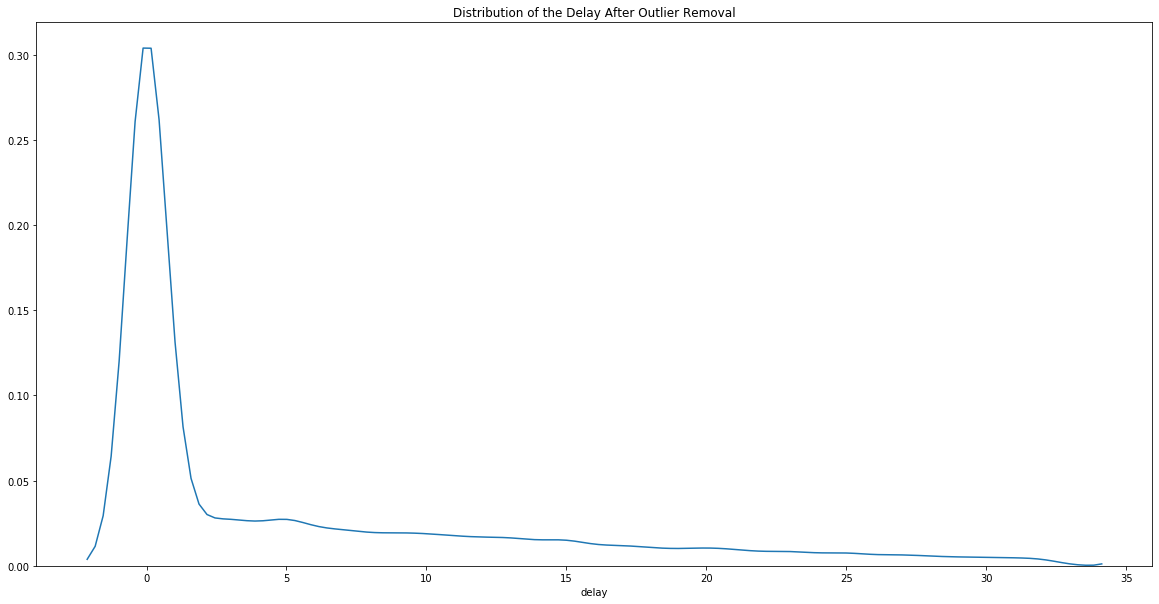

In [203]:
plt.figure(figsize=[20, 10])
sns.distplot(df["delay"], hist=False)
plt.title("Distribution of the Delay After Outlier Removal")
plt.show()

In [35]:
print(f"The total number of rows before the deletion of the outliers based on the column delay is {df.shape[0]}")

The total number of rows before the deletion of the outliers based on the column delay is 100209


### Correlation Between Numerical Features

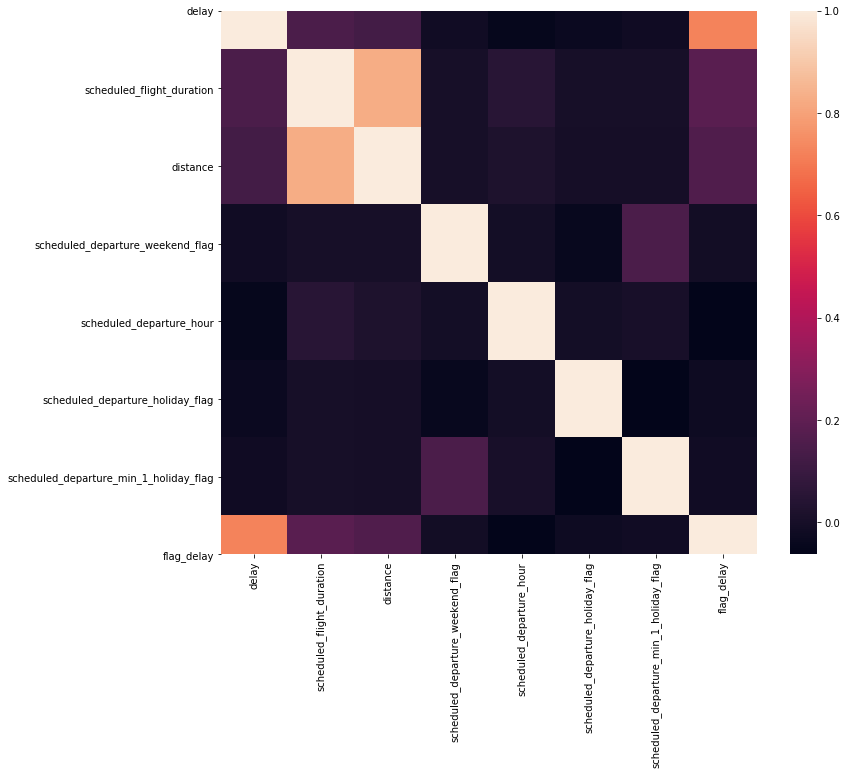

In [36]:
plt.figure(figsize=[12, 10])
sns.heatmap(df.corr())
plt.show()

### Recommendation for the Passengers

In [27]:
delay_by_features = ["airline_name", 
                     "scheduled_departure_pod", 
                     "scheduled_departure_hour", 
                     "scheduled_departure_holiday_flag", 
                     "scheduled_departure_day",
                    "arrival_airport_code",
                     "departure_airport_code",
                    "number"]
delay_bys = {}

for delay_by_feature in delay_by_features:
    cnt_delay_by_df = df.groupby(delay_by_feature).sum()["flag_delay"].reset_index().rename(columns={"flag_delay": "cnt_delay"})
    obs_delay_by_df = df.groupby(delay_by_feature).count()["flag_delay"].reset_index().rename(columns={"flag_delay": "obs_delay"})

    delay_by_df = pd.merge(cnt_delay_by_df, obs_delay_by_df,  how='left', left_on=[delay_by_feature], right_on=[delay_by_feature])
    delay_by_df["%_delay"] = delay_by_df["cnt_delay"] / delay_by_df["obs_delay"]
    
    delay_bys[delay_by_feature] = delay_by_df.sort_values(by="%_delay")

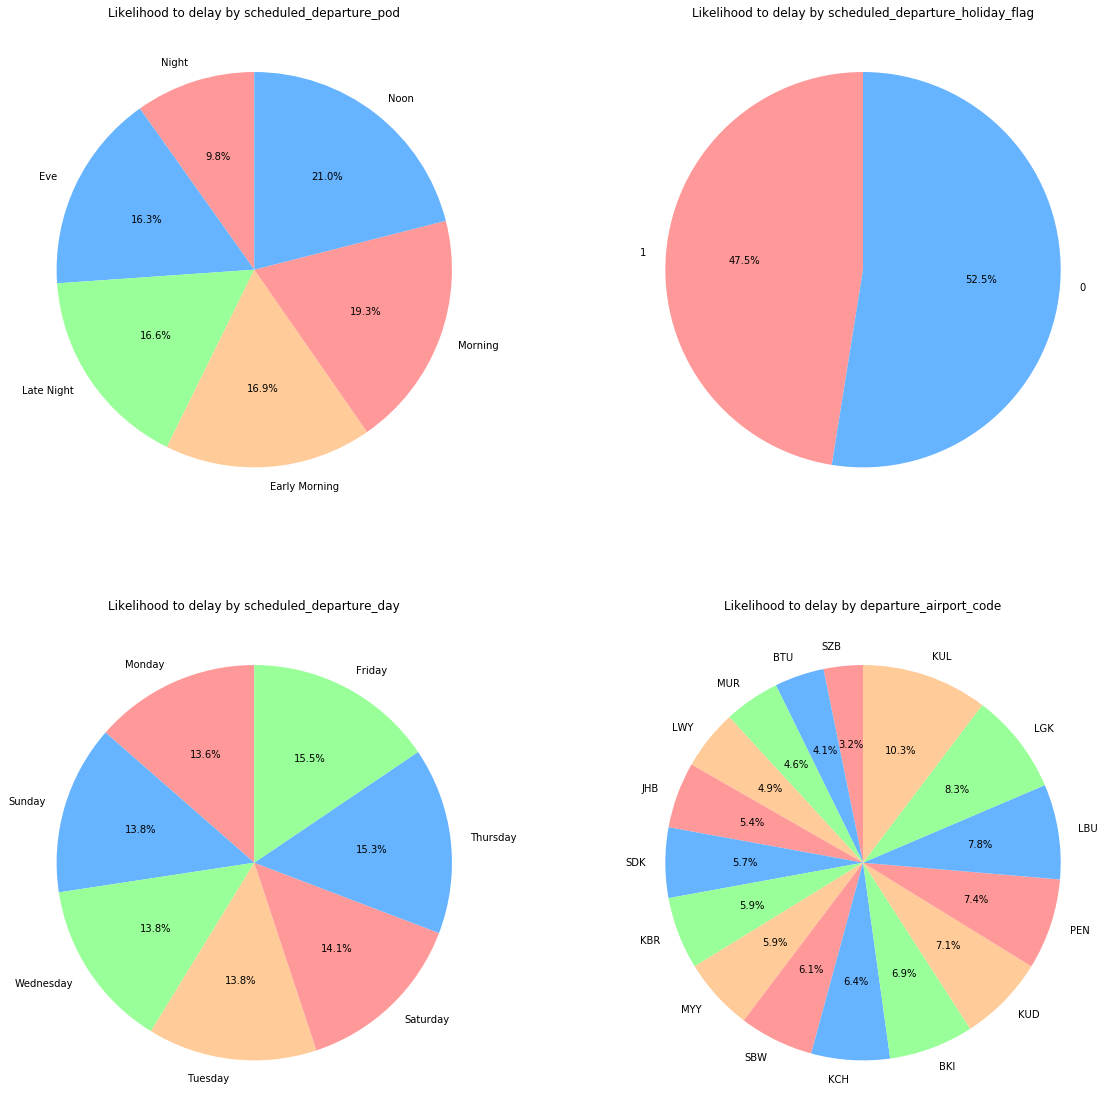

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

i, j = 0, 0
for col in ["scheduled_departure_pod", "scheduled_departure_holiday_flag", "scheduled_departure_day", "departure_airport_code"]:
    labels = list(delay_bys[col][col])
    sizes = list(round(delay_bys[col]["%_delay"] * 100))
    
    axs[i, j].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i, j].set_title(f"Likelihood to delay by {col}")
    j += 1
    
    if j % 2 == 0:
        j = 0
        i += 1
        
plt.show()

Looking at the pie charts above we can conclude these recommendations for the passengers:
1. Travelling in the night (9pm - 3am) has a lower likelihood to delay compared to traveling in the noon (12pm - 4pm)
2. Travelling in during the d-day of holiday has lower chance to delay compared to other normal days
3. There's no really significant difference between travelling on weekdays or on weekends
4. Travelling from Sultan Abdul Aziz Shah Airport (SZB) has lower chance to delay compared than the rest airport

In [107]:
delay_bys["airline_name"].head()

,airline_name,cnt_delay,obs_delay,%_delay
102,YTO Cargo,0,24,0.0
39,Firefly,0,4468,0.0
41,Guangxi Beibu Gulf Airlines,0,36,0.0
81,Silk Way West,0,14,0.0
44,Hong Kong Airlines,0,16,0.0


Travelling using Firefly is very recommended since it has zero delays even after the 4,5k flights in the month

In [109]:
delay_bys["arrival_airport_code"].head()

,arrival_airport_code,cnt_delay,obs_delay,%_delay
153,XSP,0,2,0.000000
49,GYD,0,14,0.000000
30,CNS,0,2,0.000000
86,LGL,2,24,0.083333
142,TSN,1,12,0.083333


In [110]:
delay_bys["number"].head()

,number,cnt_delay,obs_delay,%_delay
979,FY1211,0,23,0.0
989,FY1258,0,67,0.0
988,FY1256,0,36,0.0
987,FY1219,0,6,0.0
1850,MK9758,0,4,0.0


## Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

#### Univariate Linear Regression

For the purpose of creating the univariate linear regression, I used the delay as the dependent variable and distance as the independent variable

In [117]:
X = df["distance"].values.reshape(-1,1)
y = df["delay"].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 4.532 + 0.00054846X


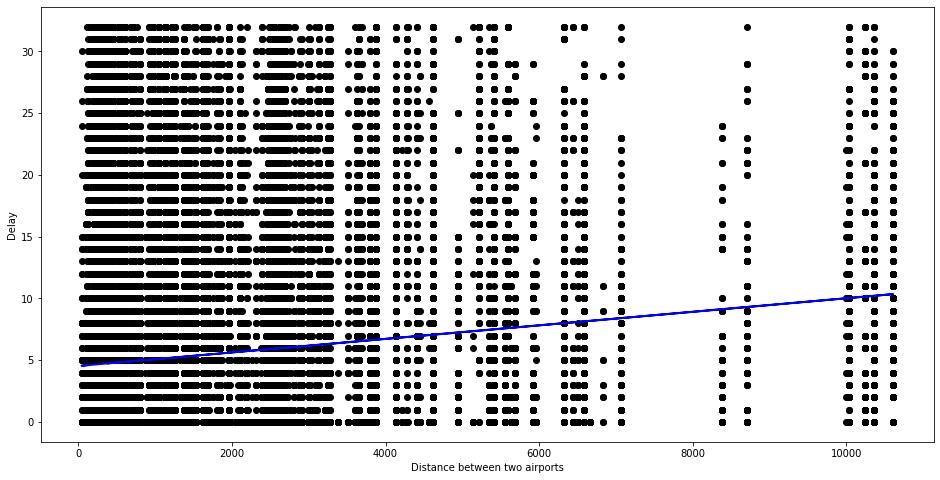

In [118]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    df['distance'],
    df['delay'],
    c='black'
)
plt.plot(
    df['distance'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Distance between two airports")
plt.ylabel("Delay")
plt.show()

In [142]:
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, f1_score

In [123]:
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f"The R2 Score for the Univariate Linear Regression model is {r2} and the mean-squared error is {mse}")

The R2 Score for the Univariate Linear Regression model is 0.015797803968807478 and the mean-squared error is 64.26617597884164


#### Multivariate Linear Regression

In [129]:
X = df[["distance", "scheduled_departure_weekend_flag", "scheduled_departure_holiday_flag"]]
y = df["delay"].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X1 {:.5}X2  {:.5}X3".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 4.7442 + 0.00054857X1 -0.28406X2  -0.62518X3


In [130]:
predictions = reg.predict(X)

In [131]:
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f"The R2 Score for the Univariate Linear Regression model is {r2} and the mean-squared error is {mse}")

The R2 Score for the Univariate Linear Regression model is 0.017008738119637545 and the mean-squared error is 64.18710471934857


### Logistic Regression

In [135]:
X = df["distance"].values.reshape(-1,1)
y = df["flag_delay"].values.reshape(-1,1)

In [134]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [139]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [154]:
y_pred = lr.predict(X_val)

The confusion matrix, AUC and F1Score for the logistic regression model

In [157]:
print(f"The confusion matrix is as follow {confusion_matrix(y_val, y_pred)}")
print(f"The F1 Score is {f1_score(y_val, y_pred)}")
print(f"The AUC is {auc(y_val, y_pred)}")

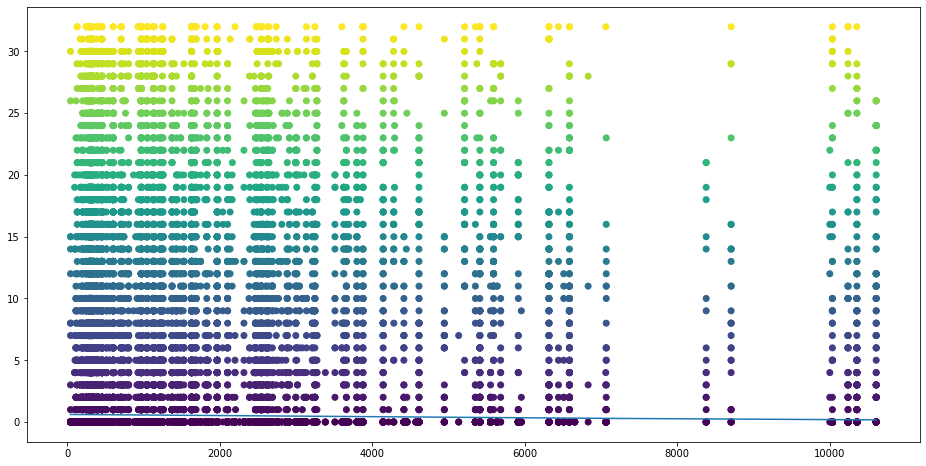

In [162]:
from scipy.special import expit

df = pd.DataFrame({'X': X_val[:,0], 'y': y_val})
df = df.sort_values(by='X')

sigmoid_function = expit(df['X'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.figure(figsize=(16, 8))

plt.plot(df['X'], sigmoid_function)
plt.scatter(df['X'], df['y'], c=df['y'])
plt.show()

#### Decision Tree

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 


In [207]:
X = df[["distance", "scheduled_departure_weekend_flag", "scheduled_departure_holiday_flag"]]
y = df["delay"]

In [208]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

In [209]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [213]:
y_pred = dt.predict(X_val)

In [219]:
print(f"The confusion matrix is as follow {confusion_matrix(y_val, y_pred)}")
print(f"The F1 Score is {f1_score(y_val, y_pred)}")
print(f"The AUC is {auc(y_val, y_pred)}")